In [47]:
import pandas as pd
import numpy as np

dataset = pd.read_excel("./dataset.xlsx")

dataset.head()

,Numbers adv,Health advantage,Average Weapon Cost,Time Pressure,Ults in use,Ults available,Result
0,0,-128,680.0,-51,0,-1,0
1,0,-50,-1400.0,-6,-1,2,0
2,4,364,1470.0,67,0,0,1
3,2,302,-1300.0,27,0,0,1
4,1,325,2622.5,21,0,1,1


#### Normalizing the data
I want all of the data values to be between -1 and 1, just so it the impact of each feature can easily be compared.


In [48]:

dataset = dataset.to_numpy()
max_of_each_column = np.abs(dataset).max(axis = 0, keepdims = True)

max_of_each_column

dataset = dataset / max_of_each_column

dataset

array([[ 0.        , -0.21333333,  0.23129252, -0.6       ,  0.        ,
        -0.33333333,  0.        ],
       [ 0.        , -0.08333333, -0.47619048, -0.07058824, -1.        ,
         0.66666667,  0.        ],
       [ 1.        ,  0.60666667,  0.5       ,  0.78823529,  0.        ,
         0.        ,  1.        ],
       [ 0.5       ,  0.50333333, -0.44217687,  0.31764706,  0.        ,
         0.        ,  1.        ],
       [ 0.25      ,  0.54166667,  0.8920068 ,  0.24705882,  0.        ,
         0.33333333,  1.        ],
       [ 0.        ,  0.05      ,  0.74404762,  0.42352941,  0.        ,
         0.        ,  1.        ],
       [ 0.5       ,  0.54166667, -0.08163265,  0.15294118,  1.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        ,  0.12244898,  0.29411765,  1.        ,
         0.33333333,  1.        ],
       [ 0.        ,  0.20833333,  1.        ,  0.08235294, -1.        ,
        -0.33333333,  1.        ],
       [ 0.25      ,  0.3333

#### Separating the winning and losing datapoints

In [49]:

winning_mask =  dataset[:, -1] == 1

# Extracting winning and losing datapoints into their respective variables
winning_datapoints = dataset[winning_mask]
losing_datapoints = dataset[winning_mask == False]

#### Calculating the average value of each feature

In [50]:
# Taking average values for each feature of both winning and losing set
winning_feature_avg = list(np.mean(winning_datapoints, axis=0)[:-1])
losing_feature_avg = list(np.mean(losing_datapoints, axis=0)[:-1])

print(winning_feature_avg, losing_feature_avg)

[0.20535714285714285, 0.2146428571428572, 0.1327113702623907, 0.2789915966386555, 0.14285714285714285, 0.2261904761904762] [-0.125, -0.17386363636363636, -0.06539888682745824, -0.19946524064171126, -0.09090909090909091, 0.10606060606060606]


#### Plotting a chart

6
7


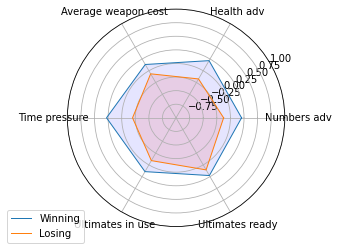

In [51]:
from matplotlib import pyplot as plt

features = pd.DataFrame(dataset, columns = ["Numbers adv", "Health adv", "Average weapon cost", "Time pressure", "Ultimates in use", "Ultimates ready", "Result"]).columns[:-1]

n_features = len(features)

from math import pi
angles = [n / float(n_features) * 2 * pi for n in range(n_features)]

angles += angles[:1]

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], features)

ax.set_rlabel_position(30)

plt.ylim(-1, 1)

# "Web" of the winning feature average
print(len(winning_feature_avg))
winning_feature_avg += winning_feature_avg[:1]
print(len(winning_feature_avg))

ax.plot(angles, winning_feature_avg, linewidth=1, linestyle='solid', label="Winning")
ax.fill(angles, winning_feature_avg, 'b', alpha=0.1)

# "Web" of the losing feature average
losing_feature_avg += losing_feature_avg[:1]

ax.plot(angles, losing_feature_avg, linewidth=1, linestyle='solid', label="Losing")
ax.fill(angles, losing_feature_avg, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()